In [4]:
import pandas as pd
import numpy as np
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from textblob import TextBlob
import re

In [3]:
webmd = pd.read_csv('webmd.csv')
webmd.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [5]:
def preprocess_text(text): 
    # get lowercase
    text = text.lower()
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove urls
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    # remove punctuation
    text = text.translate(text.maketrans('', '', string.punctuation))
    # strip whitespace
    text = text.strip()
    # remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    words = [w for w in tokens if not w in stop_words]
    text = " ".join(w for w in words)
    # stemming
    stemmer= PorterStemmer()
    tokens = word_tokenize(text)
    words = [stemmer.stem(w) for w in tokens]
    result = " ".join(w for w in words)
    return result

In [12]:
# combine all posts as one big text
reviews = webmd[webmd['Satisfaction']==5].Reviews.values
text = " ".join(str(t) for t in reviews)
# preprocess text
most_satisfied = preprocess_text(text)

In [13]:
# combine all posts as one big text
reviews = webmd[webmd['Satisfaction']==1].Reviews.values
text = " ".join(str(t) for t in reviews)
# preprocess text
least_satisfied = preprocess_text(text)

In [35]:
# combine all posts as one big text
reviews = webmd[webmd['EaseofUse']==1].Reviews.values
text = " ".join(str(t) for t in reviews)
# preprocess text
least_ease = preprocess_text(text)

In [36]:
# combine all posts as one big text
reviews = webmd[webmd['EaseofUse']==5].Reviews.values
text = " ".join(str(t) for t in reviews)
# preprocess text
most_ease = preprocess_text(text)

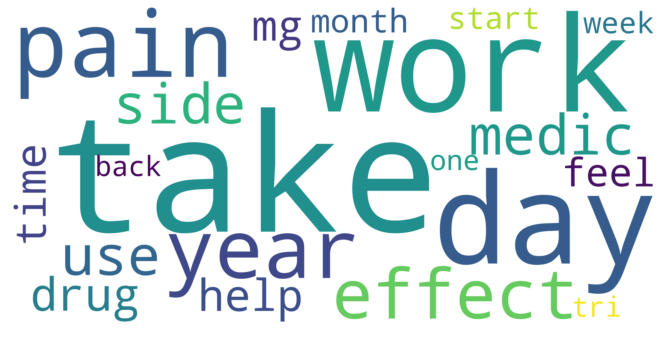

In [28]:
#  change a background color
wordcloud = WordCloud( max_font_size=100, max_words=20, width = 400, height = 200, background_color = 'white',
                      scale = 6, collocations=False).generate(most_satisfied)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

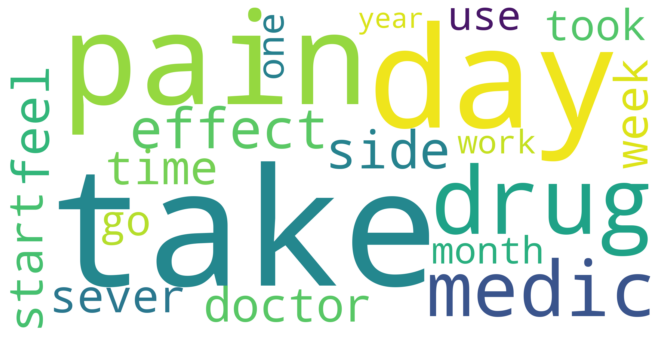

In [29]:
#  change a background color
wordcloud = WordCloud( max_font_size=100, max_words=20, width = 400, height = 200, background_color = 'white',
                      scale = 6, collocations=False).generate(least_satisfied)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

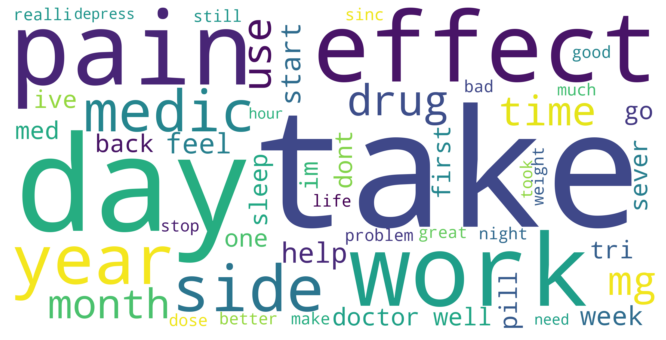

In [40]:
#  change a background color
wordcloud = WordCloud( max_font_size=100, max_words=50, width = 400, height = 200, background_color = 'white',
                      scale = 6, collocations=False).generate(most_ease)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

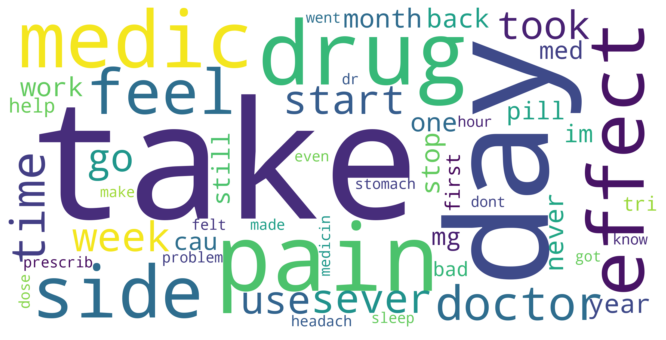

In [39]:
#  change a background color
wordcloud = WordCloud( max_font_size=100, max_words=50, width = 400, height = 200, background_color = 'white',
                      scale = 6, collocations=False).generate(least_ease)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()